In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

colnames = ['surgery', 'age', 'hospital number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube',
            'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion', 'lesion type', 'lesion type2', 'lesion type3', 'pathology data']
dropped_colnames = ['nasogastric reflux PH', 'abdominocentesis appearance', 'abdomcentesis total protein', 'abdomen', 'nasogastric tube', 'nasogastric reflux', 'rectal examination', 'lesion type2', 'lesion type3']
train_colnames = set(colnames).difference(dropped_colnames)
train_colnames = [x for x in train_colnames if x != "outcome"]
cat_colnames = ['surgery', 'age', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension',
                       'surgical lesion', 'pathology data']
numerical_colnames = ['rectal temperature', 'pulse', 'respiratory rate',
                    'packed cell volume', 'total protein']

# Read dataset file
def read_data(dataset_name):
    loc = "dataset\%s" % (dataset_name)
    df = pd.read_csv(loc,
                     sep=' ', names=colnames, header=None)
    df.columns.names = ['id']
    df.drop(dropped_colnames, axis=1, inplace=True)
    df = df.replace('?', np.nan)
    df = df.dropna(subset=['outcome'])
    # split into data and target
    X, y = df.loc[:, df.columns != 'outcome'], df.loc[:, 'outcome']
    return X, y

X, y = read_data('horse-colic.data')

# Cast Object types to float
for col in train_colnames:
    X = X.astype({col: float})

# print(X)
X.isna().sum()

id
surgery                        0
age                            0
hospital number                0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
peripheral pulse              69
mucous membranes              47
capillary refill time         32
pain                          55
peristalsis                   44
abdominal distension          56
packed cell volume            29
total protein                 33
surgical lesion                0
lesion type                    0
pathology data                 0
dtype: int64

In [14]:
# Pre-processing
filled_df = X.copy()
# Replacing missing values of categorical attributes with the most frequant value
cat_fill = filled_df.loc[:, cat_colnames]
for col in cat_colnames:
    filled_df[cat_colnames] = cat_fill.fillna(filled_df[col].mode()[0])
    
# Replacing missing values of numerical attributes with the mean value
# print(filled_df['pulse'].sum())
# num_fill[col].sum() / filled_df.shape[0]
# filled_df[numerical_colnames] = num_fill.replace(np.nan, )
filled_df[numerical_colnames] = filled_df[numerical_colnames].fillna(filled_df[numerical_colnames].mean())

# Normalization
normalized_df = filled_df.copy()
to_norm = normalized_df.loc[:, numerical_colnames]
normalized_df[numerical_colnames] = preprocessing.normalize(to_norm)
normalized_df.isna().sum()

id
surgery                       0
age                           0
hospital number               0
rectal temperature            0
pulse                         0
respiratory rate              0
temperature of extremities    0
peripheral pulse              0
mucous membranes              0
capillary refill time         0
pain                          0
peristalsis                   0
abdominal distension          0
packed cell volume            0
total protein                 0
surgical lesion               0
lesion type                   0
pathology data                0
dtype: int64

In [15]:
# split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.2)

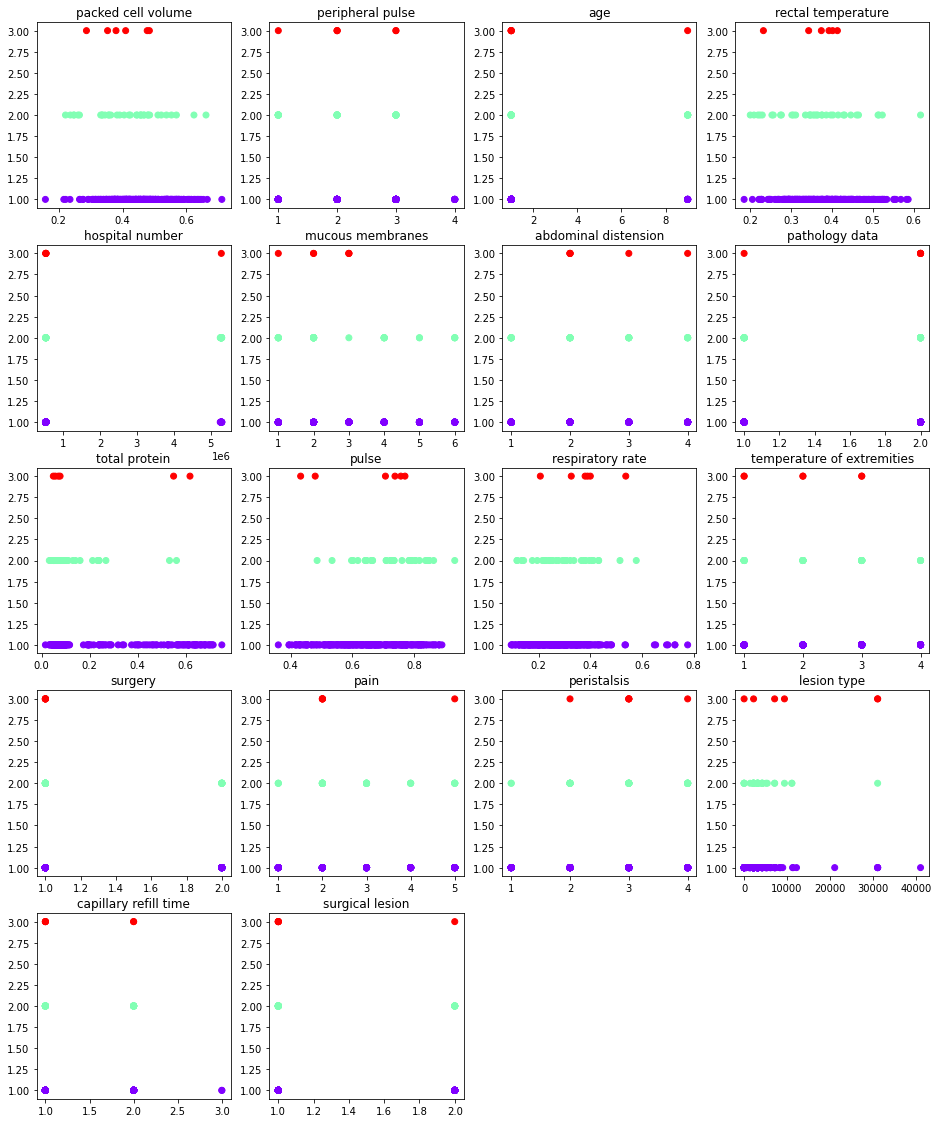

In [16]:
# K-means
refined_df = normalized_df.copy()

kmeans = KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
                n_clusters=3, n_init=10,
                random_state=0, tol=0.01, verbose=0)
k_clusters = kmeans.fit_predict(refined_df)
k_clusters += 1
refined_df['clusters'] = pd.Series(k_clusters)

n = 0
fig = plt.figure(figsize=(16, 28))
for col in train_colnames:
    p = plt.subplot(7, 4, n + 1)
    p.set_title(train_colnames[n])
    plt.scatter(refined_df[col], refined_df['clusters'],
                c=refined_df['clusters'], cmap='rainbow')
    n += 1

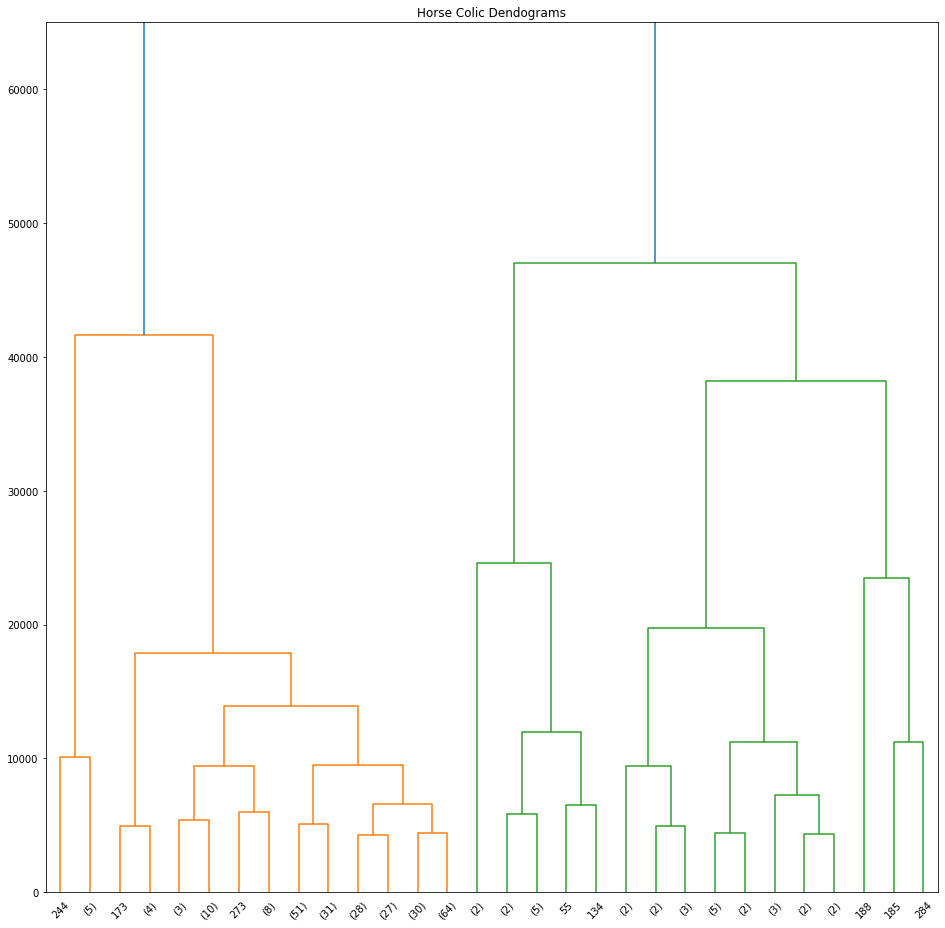

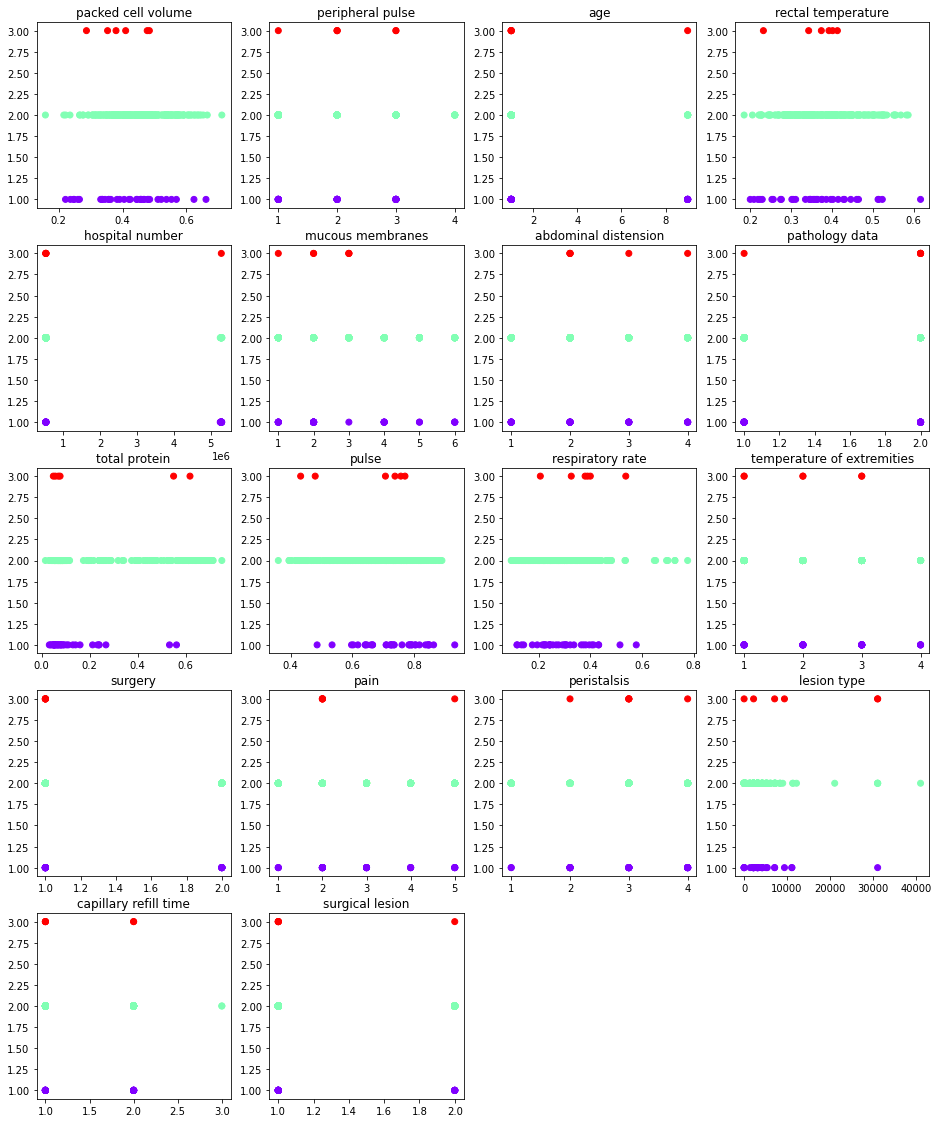

In [17]:
# Hieratical
refined_df2 = normalized_df.copy()

# Draw Dendrogram
plt.figure(figsize=(16, 16))
plt.title("Horse Colic Dendograms")
dend = shc.dendrogram(shc.linkage(
    refined_df2, method='complete'), truncate_mode='lastp')
plt.ylim(0, 65000)

Aglo = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')
h_clusters = Aglo.fit_predict(refined_df2)
h_clusters += 1
refined_df2['clusters'] = pd.Series(h_clusters)

n = 0
plt.figure(figsize=(16, 28))
for col in train_colnames:
    p = plt.subplot(7, 4, n + 1)
    p.set_title(train_colnames[n])
    plt.scatter(refined_df2[col], refined_df2['clusters'],
                c=refined_df2['clusters'], cmap='rainbow')
    n += 1

In [18]:
# Classification Report
y = y.to_numpy().astype(int)
print("K-meansHieratical clustering algorithm evaluation metrics:\n\n", classification_report(y, k_clusters))
print("____________________________________________________\n")
print("Hieratical clustering algorithm evaluation metrics:\n\n", classification_report(y, h_clusters))

K-meansHieratical clustering algorithm evaluation metrics:

               precision    recall  f1-score   support

           1       0.60      0.88      0.72       178
           2       0.43      0.19      0.27        77
           3       0.00      0.00      0.00        44

    accuracy                           0.57       299
   macro avg       0.34      0.36      0.33       299
weighted avg       0.47      0.57      0.49       299

____________________________________________________

Hieratical clustering algorithm evaluation metrics:

               precision    recall  f1-score   support

           1       0.51      0.10      0.17       178
           2       0.23      0.78      0.36        77
           3       0.00      0.00      0.00        44

    accuracy                           0.26       299
   macro avg       0.25      0.29      0.18       299
weighted avg       0.37      0.26      0.19       299

